### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [279]:
data = pd.read_csv('/Users/apekshasridhar/Downloads/assignment_5_1_starter/data/coupons.csv')

In [280]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [281]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

The car column will be dropped as a majority of the column is Nans. 

In [283]:
# Drop the car column
data.drop(columns = ['car'], inplace = True)
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

The Bar, CoffeeHouse, CarryAway, RestarauntLessThan20, and Restaraunt20to50 have few missing values which can be replaced by the most common value in their respective groups.

Text(0.5, 1.0, 'Histogram of number of Restaurant20To50 visits')

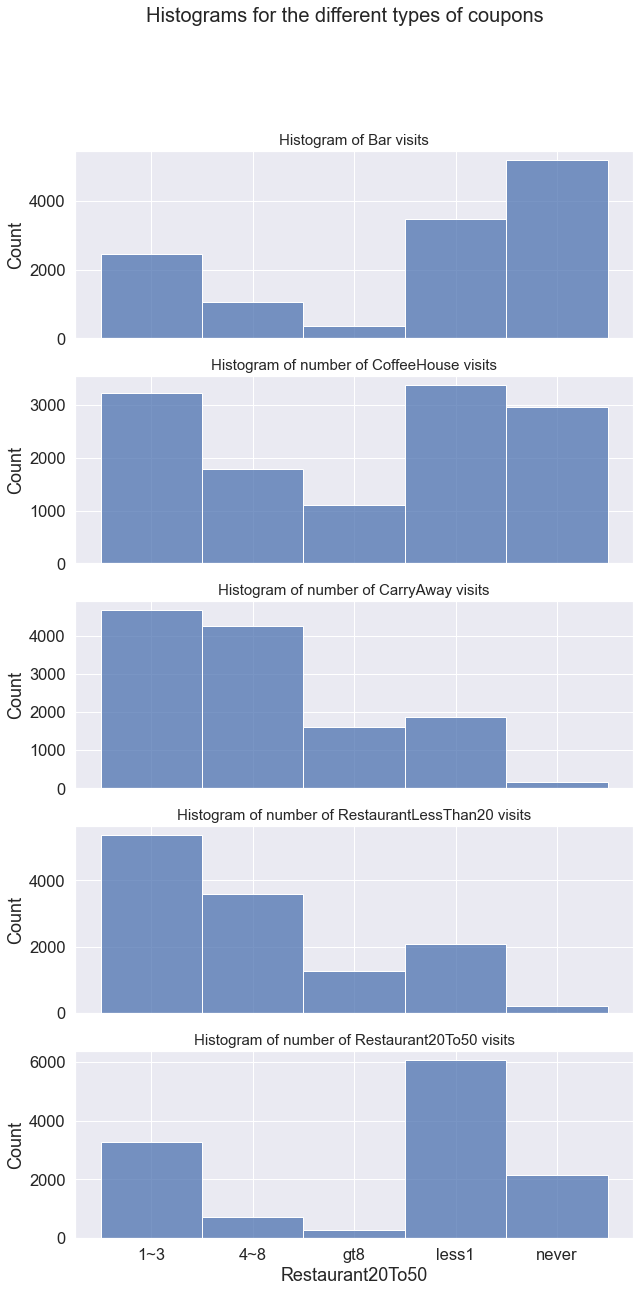

In [314]:
# Look at distributions of the Bar, CoffeeHouse, CarryAway, RestarauntLessThan20, and Restaraunt20to50 to 
# find out the most common value
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,20))
fig.suptitle('Histograms for the different types of coupons', size = 20)

sns.histplot(data, x = 'Bar', ax = axes[0])
axes[0].set_title('Histogram of Bar visits', size = 15)

sns.histplot(data, x = 'CoffeeHouse', ax = axes[1])
axes[1].set_title('Histogram of number of CoffeeHouse visits', size = 15)

sns.histplot(data, x = 'CarryAway', ax = axes[2])
axes[2].set_title('Histogram of number of CarryAway visits', size = 15)

sns.histplot(data, x = 'RestaurantLessThan20', ax = axes[3])
axes[3].set_title('Histogram of number of RestaurantLessThan20 visits', size = 15)

sns.histplot(data, x = 'Restaurant20To50', ax = axes[4])
axes[4].set_title('Histogram of number of Restaurant20To50 visits', size = 15)

The above histograms show the distribution of number of visits to each coupon category.

In [286]:
# Most common for Bar is never so I will replace the NaNs with Bar

data['Bar'] = data['Bar'].fillna('never')
data['Bar'].isnull().sum()

0

In [287]:
# Most common for CoffeeHouse is less1 

data['CoffeeHouse'] = data['CoffeeHouse'].fillna('less1')
data['CoffeeHouse'].isnull().sum()

0

In [288]:
# Most common for CarryAway is 1 to 3 

data['CarryAway'] = data['CarryAway'].fillna('1~3')
data['CarryAway'].isnull().sum()

0

In [289]:
# Most common for RestaurantLessThan20 is 1~3

data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('1~3')
data['RestaurantLessThan20'].isnull().sum()

0

In [290]:
# Most common for Restaurant20To50 is less1

data['Restaurant20To50'] = data['Restaurant20To50'].fillna('less1')
data['Restaurant20To50'].isnull().sum()

0

In [291]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Great! All NaN values are gone!

4. What proportion of the total observations chose to accept the coupon? 



In [292]:
100 * data['Y'].mean()

# 56.8% of customers chose to accept the coupon

56.84326710816777

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Carry out & Take away'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Restaurant(20-50)'),
  Text(3, 0, 'Restaurant(<20)'),
  Text(4, 0, 'Bar')])

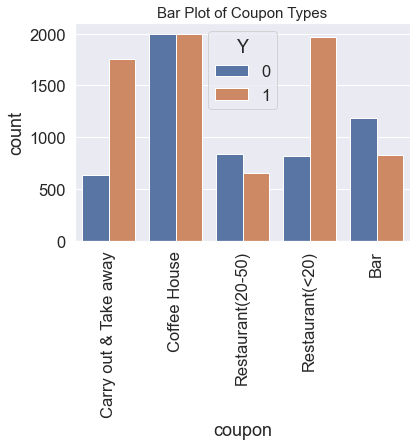

In [358]:
#fig, ax = plt.subplots(1,2, figsize = (10,5))
#plt.subplot(1,2,1)
sns.countplot(data = data, x = "coupon", hue = 'Y')
plt.title('Bar Plot of Coupon Types', size = 15)
plt.xticks(rotation=90)


The above barplot shows that the most accepted coupons were to the Coffee House the least accepted coupons were to expensive restaurants. 
However, the percentage of more accpetance than reject of the coupons was most for Carry out and cheap restaurants.

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of temperatures when drivers recieved coupon')

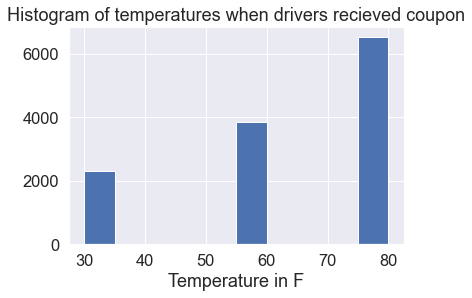

In [294]:
data.hist('temperature')
plt.xlabel("Temperature in F")
plt.title("Histogram of temperatures when drivers recieved coupon")

The above histogram of temperatures show that the most common temperature was 80 degrees when the passanger recieved the coupon.

/var/folders/2s/mcnq88w917ldql97rl5f7xcw0000gn/T/ipykernel_1065/3812545012.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Text(0.5, 1.0, 'Histogram of age for each type of coupon')

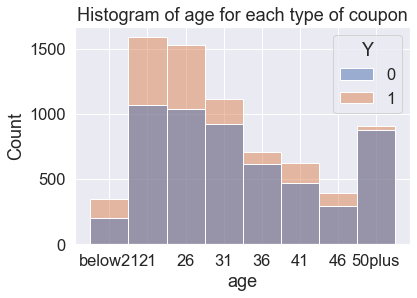

In [323]:
data = pd.read_csv('/Users/apekshasridhar/Downloads/assignment_5_1_starter/data/coupons.csv')

# Code to rearrange the df to ascending order of age (including strings such as below21) to make histogram readable

data.sort_values('age', axis=0,ascending=True, inplace = True)
target_rows = data.index[data['age'] == 'below21'].tolist()
rows = data.loc[target_rows, :]
data_below21 = data.loc[target_rows, :].copy()
data.drop(rows.index, inplace=True)
data = data_below21.append(data)

# Plotting the histogram

sns.histplot(data = data, x = 'age', hue = 'Y')
plt.title("Histogram of age")



The above histogram shows a distribution of age for those who accepted and rejected the coupon.
We observe that the age groups most likely to accept coupons are between 20-35 years.

**General Findings so far**

1. The Bar and expensive restaraunt coupons were the least accepted type of coupon.
2. The Carry Out and cheap restaurants wre the highest accepted coupons.
2. The age groups most likely to accept coupons are between 20-35 years.

### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [296]:
df_bar = data.query('coupon == "Bar"')
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11220,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,below21,Unmarried partner,...,never,1~3,less1,never,1,1,0,0,1,0
11232,Work,Alone,Snowy,30,7AM,Bar,1d,Male,below21,Unmarried partner,...,never,1~3,less1,never,1,1,1,0,1,0
4866,Home,Alone,Sunny,80,10PM,Bar,1d,Male,below21,Single,...,1~3,4~8,1~3,less1,1,1,0,1,0,1
4852,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,below21,Single,...,1~3,4~8,1~3,less1,1,0,0,0,1,1
9158,Work,Alone,Rainy,55,7AM,Bar,1d,Male,below21,Single,...,never,less1,never,NaN,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7438,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Female,50plus,Married partner,...,4~8,1~3,1~3,less1,1,1,0,0,1,0
7439,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,50plus,Married partner,...,4~8,1~3,1~3,less1,1,1,0,0,1,0
2584,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Single,...,1~3,less1,1~3,less1,1,0,0,0,1,1
2403,Work,Alone,Sunny,55,7AM,Bar,1d,Female,50plus,Married partner,...,never,4~8,gt8,less1,1,1,1,0,1,0


2. What proportion of bar coupons were accepted?


In [297]:
100 * df_bar['Y'].mean()

# 41% of customers chose to accept the coupon

41.00148735746158

41% of customers chose to accept the bar coupon

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [298]:
# Create column for more than 3 visits to bar

bar_more3 = ["4~8", "gt8"]
df_bar_copied = df_bar.copy() #Making a copy to not get the SettingWIthCopyWarning warning
df_bar_copied['More than 3 visits'] = np.where(df_bar_copied['Bar'].isin(bar_more3), True, False)
df_bar_copied.groupby('More than 3 visits')['Y'].mean()


More than 3 visits
False    0.370737
True     0.768844
Name: Y, dtype: float64

Text(0.5, 1.0, 'Pie Chart of Number of Visits for accepted bar coupons')

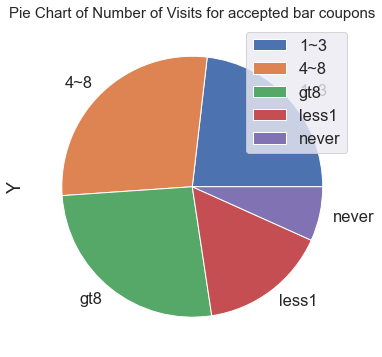

In [361]:
# Visalizing above results

df_bar_copied.groupby(['Bar']).mean().plot(kind='pie', y='Y', figsize = (11,6))
plt.title('Pie Chart of Number of Visits for accepted bar coupons', size = 15)


The pie chart above shows that the highest acceptance rates are for those going more than 3 times to the Bar

/var/folders/2s/mcnq88w917ldql97rl5f7xcw0000gn/T/ipykernel_1065/1832921413.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:xlabel='Bar', ylabel='Count'>

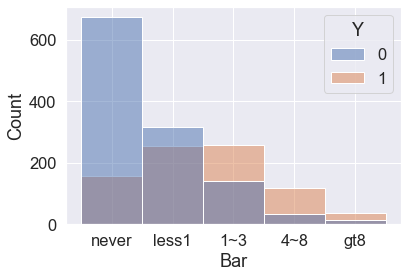

In [366]:
# Code to rearrange the df to ascending order of visits to bar to make histogram readable

df_bar_copied = df_bar.copy() #Making a copy to not get the SettingWIthCopyWarning warning
data.sort_values('Bar', axis=0,ascending=True, inplace = True)
target_rows = df_bar_copied.index[df_bar_copied['Bar'] == 'gt8'].tolist()
rows = df_bar_copied.loc[target_rows, :]
data_gt8 = df_bar_copied.loc[target_rows, :].copy()
df_bar_copied.drop(rows.index, inplace=True)
df_bar_copied = df_bar_copied.append(data_gt8)


# Plotting above data to make visual comparisons

sns.histplot(df_bar_copied,x = 'Bar', hue = 'Y')


Based on analysis and the graph, those who went to the bar more than 3 times were twice as likely to accept the coupon compared to those who went less than 3 times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [301]:
bar_more1 = ["1~3", "4~8", "gt8"]
age_less25 = ['21', 'below21']

# create column for above conditions
df_bar_copied.loc[:,'Bar_more1_age_more25'] = np.where((df_bar_copied['Bar'].isin(bar_more1)) & (~df_bar_copied['age'].isin(age_less25)), True, False)
df_bar_copied.groupby('Bar_more1_age_more25')['Y'].mean()


Bar_more1_age_more25
False    0.335003
True     0.695238
Name: Y, dtype: float64

Text(0.5, 1.0, 'Histogram of number of Bar visits (REJECTED coupons)')

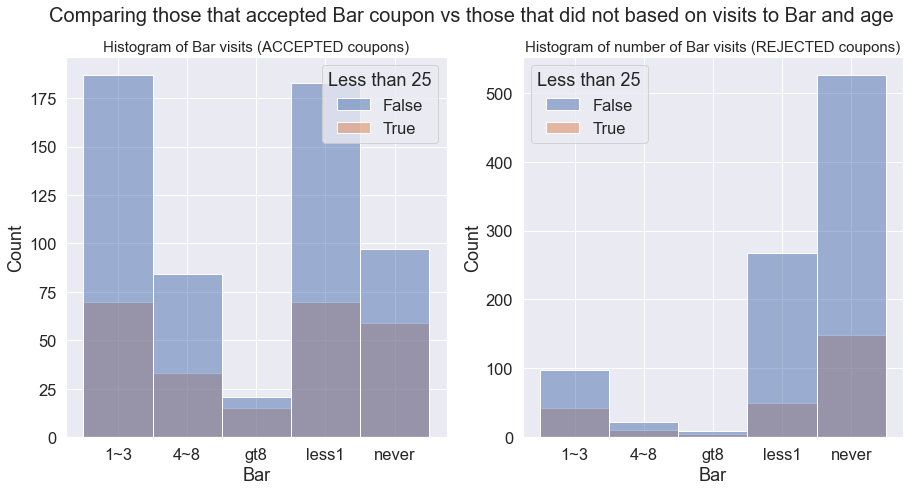

In [338]:
# Plotting the above comparison

# create a new column for above 25 and below 25 years 
age_less25 = ['21', 'below21']
df_bar_copied['Less than 25'] = np.where(df_bar_copied['age'].isin(age_less25), True, False)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
fig.suptitle('Comparing those that accepted Bar coupon vs those that did not based on visits to Bar and age', size = 20)

sns.histplot(df_bar_copied.query('Y == 1').sort_values('Bar'), ax = axes[0], x = 'Bar', hue = 'Less than 25')
axes[0].set_title('Histogram of Bar visits (ACCEPTED coupons)', size = 15)

sns.histplot(df_bar_copied.query('Y == 0').sort_values('Bar'), ax = axes[1], x = 'Bar', hue = 'Less than 25')
axes[1].set_title('Histogram of number of Bar visits (REJECTED coupons)', size = 15)


It appears that drivers who are over  25 years and go to the bar more than once a month are more likely to accept the coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [303]:
bar_more1 = ["1~3", "4~8", "gt8"]
occ = ["farming", "fishing", "forestry"]
passan = ["Kid(s)"]

df_bar_copied['Bar_more1_notkid_otherocc'] = np.where((df_bar_copied['Bar'].isin(bar_more1)) & (~df_bar_copied['passanger'].isin(passan)) & (~df_bar_copied['occupation'].isin(occ)), True, False)
df_bar_copied.groupby('Bar_more1_notkid_otherocc')['Y'].mean()



Bar_more1_notkid_otherocc
False    0.296044
True     0.713249
Name: Y, dtype: float64

43.3% of those who went to a bar more than once a month and and had passengers that were not a kid and had occupations other than farming, fishing, or forestry accepted the coupon while 20.8% of others accepted the coupon. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [304]:
bar_more1 = ["1~3", "4~8", "gt8"]
occ = ["farming", "fishing", "forestry"]
passan = ["Kid(s)"]
wid = ['widowed']
cheap_rest = ["4~8", "gt8"]
age_less30 = ['21', 'below21', '26']
income_more50 = ['$50000 - $62499', '$75000 - $87499', '$87500 - $99999', '$62500 - $74999']


df_bar_copied['Bar_conditions'] = np.where(((df_bar['Bar'].isin(bar_more1)) & (~df_bar['passanger'].isin(passan)) \
                                    & (~df_bar['maritalStatus'].isin(wid))) | \
                                    ((df_bar['Bar'].isin(bar_more1)) & (df_bar['age'].isin(age_less30))) |\
                                    ((df_bar['RestaurantLessThan20'].isin(cheap_rest)) & (~df_bar['income'].isin(income_more50))),\
                                    True, False)
df_bar_copied.groupby('Bar_conditions')['Y'].mean()



Bar_conditions
False    0.403369
True     0.418448
Name: Y, dtype: float64

**Findings for Bar coupons**

The following characteristics of passangers are most likely associtaed with accepting the bar coupon:

1. younger drivers (mostlly 21 and 26 year olds), 
2. those who go to bars between 1 and 3 times a month,
3. those who do drive alone and 
4. those who are in occupations other than farming, fishing and forestery are more likely to accept the bar coupon

**Next Steps and Recommendations for Bar coupons**

1. Sending out Bar coupons can be targetted to young adults who go to bars often
2. Bar coupons can be avoided to those driving in carpool lane, as they would not be driving alone, reducing their chances of accepting the coupon
3. Another factor we should potentitally consider that is not in this dataset is what day of the week would they be most likely to accept the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Exploring the CoffeeHouse coupon**

*Problem Statement*

What characteristics of passangers accept the Coffee House coupons

First let us create a DataFrame of just the CoffeeHouse coupons

In [306]:
df_CH = data.query('coupon == "Coffee House"')
df_CH

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5304,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Unmarried partner,...,less1,4~8,1~3,1~3,1,1,0,0,1,0
3788,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Female,26,Single,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
6646,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,1d,Male,26,Unmarried partner,...,4~8,1~3,4~8,less1,1,0,0,0,1,1
11025,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
11026,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
522,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0


Double check that there are no missing values

In [307]:
df_CH.isnull().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     3959
Bar                       37
CoffeeHouse               72
CarryAway                 57
RestaurantLessThan20      50
Restaurant20To50          55
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
Y                          0
dtype: int64

1. What proportion of Coffee House coupons were accepted?


In [308]:
100 * df_CH['Y'].mean()

49.92492492492492

Almost 50% of Coffee House coupons were accepted

2. See percentage of accepting coupons for each gender

Text(0.5, 1.0, 'Pie Chart of Number of Visits for accepted coupons')

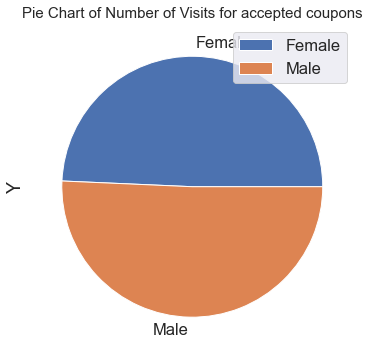

In [363]:

#plt.subplot(1,2,2)
df_CH.groupby(['gender']).mean().plot(kind='pie', y='Y', figsize = (11,6))
plt.title('Pie Chart of Number of Visits for accepted coupons', size = 15)


The pie chart above shows that disregarding other variables, males and females have around the same acceptance rates are for Coffee House

3. Include age into the mix, and compare the age and gender for those who accept the Coffee House coupon

3a. Plot

Text(0.5, 1.0, 'Histogram of Age and Gender of REJECTED coupons')

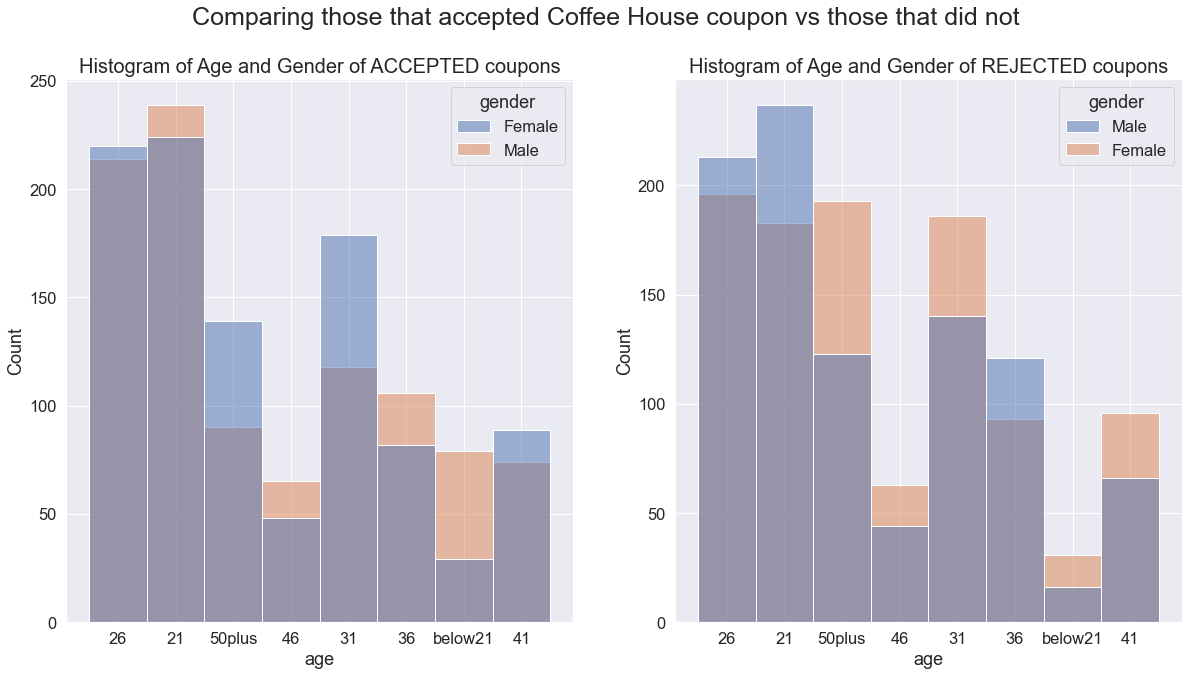

In [309]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
fig.suptitle('Comparing those that accepted Coffee House coupon vs those that did not', size = 25)

sns.histplot(df_CH.query('Y == 1'), ax = axes[0], x = 'age', hue = 'gender')
axes[0].set_title('Histogram of Age and Gender of ACCEPTED coupons', size = 20)

sns.histplot(df_CH.query('Y == 0'), ax = axes[1], x = 'age', hue = 'gender')
axes[1].set_title('Histogram of Age and Gender of REJECTED coupons', size = 20)




Here are a couple of observations based on the above graph:
1. The number of drivers that aceepted the Coffee House coupon are more for those below 21
2. Males below 21 years are more likely to accept the coupons than reject 
3. Females at 26 years old are more likely to accept the coupons than reject

3b. Analysis: Compare drivers who are less than 21 years and who are males

In [310]:
age_less25 = ['below21']

# create column for above conditions
df_CH_copied = df_CH.copy() #To not get the SettingWIthCopyWarning warning
df_CH_copied['CH_male_age21'] = np.where((df_CH['gender']== 'Male') & (df_CH['age'].isin(age_less25)), True, False)
df_CH_copied.groupby('CH_male_age21')['Y'].mean()


CH_male_age21
False    0.491156
True     0.831579
Name: Y, dtype: float64

4. Relation of marital status to accepting coffee house coupons

In [311]:
# Cross Tab summary of marital status and visits to coffee house for those who accepted the coupon

crosstb = pd.crosstab([df_CH_copied.query('Y ==1')['maritalStatus']],df_CH_copied.query('Y ==1')['CoffeeHouse'],normalize=True)*100
crosstb = pd.crosstab([df_CH_copied['maritalStatus']],df_CH_copied['Y'],normalize=True)*100
crosstb

Y,0,1
maritalStatus,,
Divorced,1.801802,1.976977
Married partner,19.544545,19.019019
Single,18.768769,20.020020
Unmarried partner,9.359359,8.583584
Widowed,0.600601,0.325325


<AxesSubplot:xlabel='maritalStatus'>

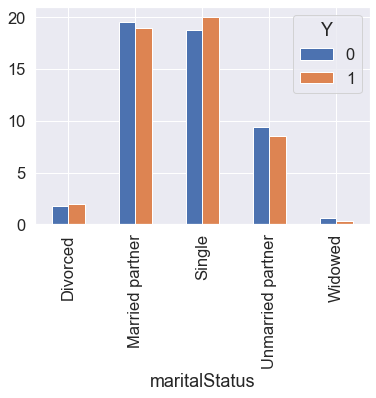

In [312]:
# Plot bar plot of above crosstab

crosstb.plot.bar()

From the above analysis and bar plot, it appears as though Divorced and Single passangers are most likely to accept the Coffee House coupons.

3. Compare the acceptance rates between those drivers who:    
    a. are male, and are single OR    
    b. are male and are under the age of 21

In [313]:
marStatus = ["Single"]
age_less21 = ['below21'] 


df_CH_copied['CH_conditions'] = np.where(((df_CH_copied['gender']== 'Male') & (df_CH_copied['maritalStatus'].isin(marStatus)) |\
                                    ((df_CH_copied['gender']== 'Male') & (df_CH_copied['age'].isin(age_less21)))),\
                                    True, False)
df_CH_copied.groupby('CH_conditions')['Y'].mean()


CH_conditions
False    0.485043
True     0.549042
Name: Y, dtype: float64

**Findings for Coffee House coupons**

The following characteristics of passangers are most likely associtaed with accepting the Coffee House coupon:

1. The number of drivers that aceepted the Coffee House coupon are more for those below 21
2. Males below 21 years are more likely to accept the coupons than reject
3. Females at 26 years old are more likely to accept the coupons than reject
4. Divorced and Single passangers are most likely to accept the Coffee House coupons.

**Next Steps and Recommendations for Coffee House coupons**

1. Sending out Coffee House coupons can be targetted to drivers under 21 years, especially males
2. Those who are single and divorced can be prioritized for Coffee House coupons
